<a href="https://colab.research.google.com/github/Jenicisprakash/machine-learning/blob/main/geospatial_using_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import geopandas as gpd
from shapely.geometry import Point,Polygon
import matplotlib.pyplot as plt

In [30]:
top = Polygon([(0,1),(0,2),(2,2),(2,1)])
bottom = Polygon([(-1,0),(-1,1),(4,1),(4,0)])
wheel_front = Point(0,-0.5).buffer(0.5)
wheel_rear = Point(3,-0.5).buffer(0.5)

In [31]:
geometries = [top,bottom,wheel_front,wheel_rear]
geometries

[<POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))>,
 <POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))>,
 <POLYGON ((0.5 -0.5, 0.498 -0.549, 0.49 -0.598, 0.478 -0.645, 0.462 -0.691, ...>,
 <POLYGON ((3.5 -0.5, 3.498 -0.549, 3.49 -0.598, 3.478 -0.645, 3.462 -0.691, ...>]

In [32]:
gdf = gpd.GeoDataFrame(geometry=geometries)
gdf.set_crs(4326)
display(gdf)

,geometry
0,"POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))"
1,"POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))"
2,"POLYGON ((0.5 -0.5, 0.49759 -0.54901, 0.49039 ..."
3,"POLYGON ((3.5 -0.5, 3.49759 -0.54901, 3.49039 ..."


In [33]:
gdf['geometry_length'] = gdf.length
gdf['geometry_area'] = gdf.area
gdf.head(1)


,geometry,geometry_length,geometry_area
0,"POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))",6.0,2.0


In [34]:
gdf['geometry'] = [g.buffer(0.2) for g in gdf.geometry.to_list()]
gdf.head()

,geometry,geometry_length,geometry_area
0,"POLYGON ((0 0.8, -0.0196 0.80096, -0.03902 0.8...",6.000000,2.000000
1,"POLYGON ((-1 -0.2, -1.0196 -0.19904, -1.03902 ...",12.000000,5.000000
2,"POLYGON ((0.69976 -0.49019, 0.69976 -0.50981, ...",3.140331,0.784137
3,"POLYGON ((3.69976 -0.49019, 3.69976 -0.50981, ...",3.140331,0.784137


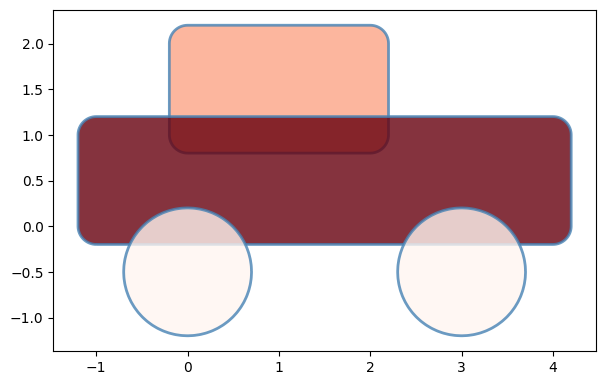

In [35]:
f,ax = plt.subplots(1,1,figsize = (7,7))
gdf.plot(column = 'geometry_length', ax=ax, cmap='Reds',edgecolor='steelblue',linewidth=2,alpha = 0.8)
gdf_nyc = gdf.set_crs(4263)
gdf_hun = gdf.set_crs(23700)

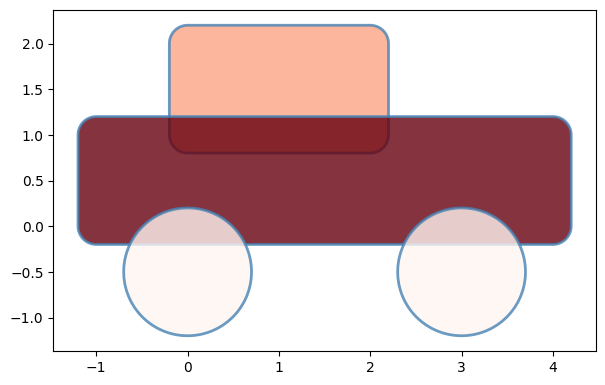

In [36]:
f,ax = plt.subplots(1,1,figsize = (7,7))
gdf_nyc.plot(column = 'geometry_length', ax=ax, cmap='Reds',edgecolor='steelblue',linewidth=2,alpha = 0.8)
plt.show()

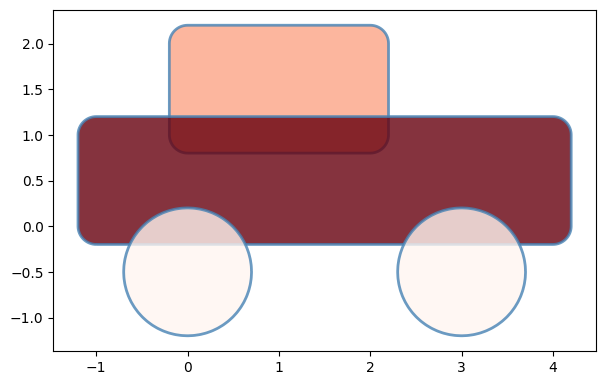

In [37]:
f,ax = plt.subplots(1,1,figsize = (7,7))
gdf_hun.plot(column = 'geometry_length', ax=ax, cmap='Reds',edgecolor='steelblue',linewidth=2,alpha = 0.8)
plt.show()